# Lista de exercícios sobre libraria TensorFlow

<br/>**Disciplina**: Introdução a redes neurais profundas 2017/1
<br/>**Professor**: Jorge Leonid Aching Samatelo

**Aluno**: Pedro Farias

## Tabela de conteúdos
1. [Indicações](#indicacoes)
1. [Exercícios sobre CNNs](#ExerCNN)
1. [Bibliografia](#Bibio)

## Indicações <a name="indicacoes"></a>

### Considerações
* Cada aluno enviará por e-mail a solução dos exercícios propostos, tais soluções devem ser inseridas neste mesmo arquivo. 
* Para saber sobre a libraria `TensorFlow` é necessario ler os slides: `001_TENSORFLOW_INTRO_2x2.pdf`,`002_TENSORFLOW_LINEAR_REGRESSION_2x2.pdf`,`003_TENSORFLOW_ANN_2x2.pdf` e `004_TENSORFLOW_CNN.pdf`.
* Para saber cómo trabalhar com arquivos `*.ipynb` é necessario ler os slides `003_JUPYTER_2x2.pdf`.
* Usar o interprete de `python 3.5`.

### Prazo
* Envio das soluções: Domingo 24/06/2017 - (11:59 pm) 

### Procedimento para o envio das soluções
* O arquivo `*.ipynb` com as soluções dos exercícios deve ser enviado ao email <jlasam001@gmail.com> com o assunto: `LISTA_EXERCICIO_CNN_2017_1`. 
* O nome do arquivo `*.ipynb` deve iniciar com o rotulo `DL_LISTA_CNN` seguido pelas iniciais do nome do aluno que soluciono os exercícios (por exemplo, o aluno Pedro Farias enviara o arquivo `DL_LISTA_CNN_PF.ipynb`).

### Dicas execução
* Carregue todos os pacotes que serão necessários no início do arquivo.
* Entre um exercício e outro, utilize um grafo diferente ou então reínicie o grafo padrão.
---

**Tip**: When using `Jupyter notebook` make sure to call `tf.reset_default_graph()` at the beginning to clear the symbolic graph before defining new nodes.

---
* Para executar comandos da shell dentro do notebook, utilize o prefixo `!` antes do comando de shell. (e.g. para listar os arquivos da pasta atual faça `! ls` para UNIX ou `! dir` para Windows.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Exercícios sobre CNNs <a name="ExerCNN"></a>

## Exe. 1
Usando TensorFlow criar uma CNN com a estrutura detalhada na Figura abaixo . A CNN deve solucionar o problema de classificação do número MNIST, como foi feito no tutorial dos slides `003_TENSORFLOW_ANN_2x2.pdf` e `004_TENSORFLOW_CNN.pdf`.

Como pode é observado na Figura, temos:
* **Camada 0**. é a imagem de dígitos MNIST `28×28` em escala de cinza. 
* **Camada 1**. Camada convolucional com `32` filtros de tamanho `5×5`, com um `stride` de `1`, um `padding` de `2` e função de ativação `ReLU`. 
* **Camada 2**. Camada `Max-pooling` com filtro `2×2` com um `stride` de `2`. 
* **Camada 3**. Camada convolucional com `64` filtros de tamanho `5×5`, com um `stride` de `1`, um `padding` de `2` e função de ativação `ReLU`.
* **Camada 4**. Camada `Max-pooling` com filtro `2×2` com um `stride` de `2`.
* **Camada 5**. Camada totalmente conectada com `3164` (`=7×7×64`) neuronios com função de ativação `ReLU` para cada neuronio.
* **Camada 6**. Camada totalmente conectada com `1000` neuronios com função de ativação `Softmax` para cada neuronio.
* **Camada 7**. Camada totalmente conectada com `10` neuronios, para produzir as probabilidades relacionada ás 10 classes a serem preditas.

<img src=Exercicio1_CNN.png>

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

LOGDIR = '/tmp/mnist/'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
def conv_layer(input_x, shape, name='conv_layer'):
  with tf.name_scope(name):
    w = tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0.1, shape=[shape[3]]), name='B')
    conv = tf.nn.conv2d(input_x, w, strides=[1, 1, 1, 1], padding="SAME")
    act = tf.nn.relu(conv + b)
    
    tf.summary.histogram('weights', w)
    tf.summary.histogram('biases', b)
    tf.summary.histogram('activations', act)
    
    return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
  
def fc_layer(input_x, size_in, size_out, name='fc_layer'):
  with tf.name_scope(name):
    w = tf.Variable(tf.truncated_normal([size_in, size_out], stddev=0.1), name="W")
    b = tf.Variable(tf.constant(0.1, shape=[size_out]), name="B")
    act = tf.matmul(input_x, w) + b
    
    tf.summary.histogram('weights', w)
    tf.summary.histogram('biases', b)
    tf.summary.histogram('activations', act)
    
    return act, w
  
def mnist_model(learning_rate, steps=2000):
  tf.reset_default_graph()
  sess = tf.Session()
  
  # Placeholders and reshape the data
  x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
  y = tf.placeholder(tf.float32, shape=[None, 10], name='labels')
  keep_prob = tf.placeholder(tf.float32, name='keep_prob')
  
  x_image = tf.reshape(x, [-1,28,28,1])
  tf.summary.image('input', x_image, 3)
  
  # Convolutional and pooling layers  
  conv1 = conv_layer(x_image, shape=[5,5,1,32], name='conv1')
  conv2 = conv_layer(conv1, shape=[5,5,32,64], name='conv2')
  
  # Fully connected layers and dropout
  flattened = tf.reshape(conv2, [-1, 7 * 7 * 64])
  
  fc1 = fc_layer(flattened, 7*7*64, 1000, name='fc1')
  relu = tf.nn.relu(fc1[0])
  
  fc1_drop = tf.nn.dropout(relu, keep_prob=keep_prob, name='dropout')
  
  fc2 = fc_layer(fc1_drop, 1000, 10, 'fc2')               
  logits = fc2[0]
  
  tf.summary.histogram('fc1/relu', relu)
  
  # Loss function
  with tf.name_scope('xent'):
    cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y), 
        name='xent')
    
    tf.summary.scalar('xent', cross_entropy)
 
  # Optimizer
  with tf.name_scope('train'):
    train_op = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
    
  # Accuracy
  with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar("accuracy", accuracy)
  
  summ = tf.summary.merge_all()
  
  sess.run(tf.global_variables_initializer())
  writer = tf.summary.FileWriter(LOGDIR)
  writer.add_graph(sess.graph)
  
  # Session
  finalRepresentations = [] # for t_SNE
  
  for i in range(steps):
    batch_x,batch_y = mnist.train.next_batch(50)
    if i % 5 == 0:
      [train_accuracy, s] = sess.run([accuracy, summ], feed_dict={
          x: batch_x, y: batch_y, keep_prob: 1.0})
      writer.add_summary(s, i)
      
    if i%100 == 0:
      print('train accuracy on step {}: {}'.format(
          i, sess.run(accuracy, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})))
      
      finalRepresentations.append(logits.eval(session=sess, feed_dict={
          x:mnist.test.images, keep_prob:1.0}))
            
    sess.run(train_op, feed_dict={x:batch_x, y:batch_y, keep_prob: 0.5})
    
  print('test accuracy: ', sess.run(accuracy, feed_dict={
      x: mnist.test.images, y: mnist.test.labels, keep_prob: 1.0}))
  
  #return logits weights to use in t-SNE
  return fc2[1].eval(session=sess), finalRepresentations
    
model = mnist_model(learning_rate=0.001, steps=500) 

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

train accuracy on step 0: 0.03999999910593033
train accuracy on step 100: 0.9399999976158142
train accuracy on step 200: 1.0
train accuracy on step 300: 1.0
train accuracy on step 400: 0.9399999976158142
test accuracy:  0.9752


## Exe. 2
Tomando em conta o seguinte material 
https://www.analyticsvidhya.com/blog/2017/07/debugging-neural-network-with-tensorboard/

Use o tensorboard para:
* Imprimir o grafo que representa a  CNN em tensorflow.
* Graficar as distribuições dos pesos e os emviesamentos da CNN.


In [5]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = '/tmp/mnist/'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2018-07-02 16:25:28--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.55.191.55, 52.207.5.158, 52.207.39.76, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.55.191.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]   5.11M  7.66MB/s    in 0.7s    

2018-07-02 16:25:29 (7.66 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://60659a73.ngrok.io


## Exe. 3
Tomando em conta o seguinte material
https://medium.com/@awjuliani/visualizing-deep-learning-with-t-sne-tutorial-and-video-e7c59ee4080c
* Use o algoritmo t-SNE para visualizar a como estão relacionados os pesos da ultima camada com as classes correspondentes.



In [0]:
from sklearn.manifold import TSNE
import scipy.io.wavfile

def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
  assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
  plt.figure(figsize=(5, 5))  #in inches
  for i, label in enumerate(labels):
    x, y = lowDWeights[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
#   plt.savefig(filename)

In [0]:
testY = np.argmax(mnist.test.labels,1)
finalWs = model[0]
finalRepresentations = model[1]

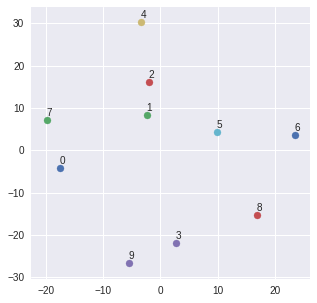

In [8]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)
plot_only = 6
lowDWeights = tsne.fit_transform(finalWs)
labels = ['0','1','2','3','4','5','6','7','8','9']
plot_with_labels(lowDWeights, labels)

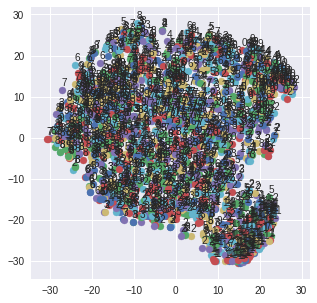

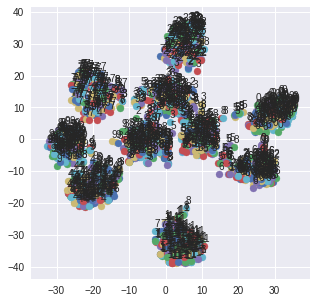

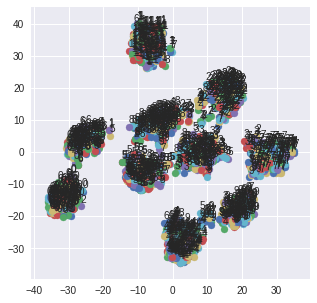

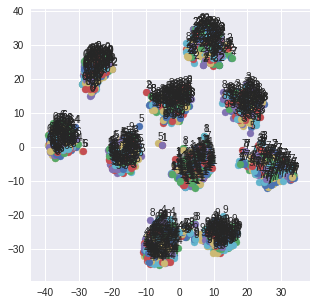

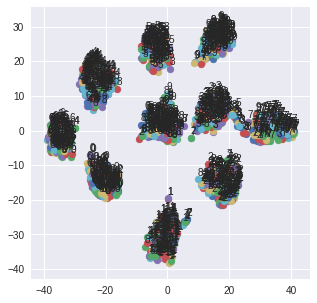

In [9]:
iters = 0
for i in finalRepresentations:
    tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=500)
    plot_only = 2000
    lowDWeights = tsne.fit_transform(i[0:plot_only,:])
    labels = testY[0:plot_only]
    plot_with_labels(lowDWeights, labels)
    iters+=1

## Bibliografia <a name="Bibio"></a>

1. http://www.labri.fr/perso/nrougier/teaching/numpy.100/
2. https://www.tensorflow.org/get_started/mnist/pros 